In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris=load_iris()
logreg=LogisticRegression()

scores=cross_val_score(logreg, iris.data, iris.target)
print(scores)

[ 0.96078431  0.92156863  0.95833333]


In [3]:
scores=cross_val_score(logreg, iris.data, iris.target, cv=5)
print(scores.mean())

0.96


In [4]:
scores=cross_val_score(logreg, iris.data, iris.target, cv=3)
print(scores)

[ 0.96078431  0.92156863  0.95833333]


In [5]:
#перекрестная проверка
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

scores=cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print(scores)

[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [6]:
kfold = KFold(n_splits=3)

scores=cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print(scores)

[ 0.  0.  0.]


In [7]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

scores=cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print(scores)

[ 0.9   0.96  0.96]


In [8]:
#перекрестная проверка с исключением по одному
from sklearn.model_selection import LeaveOneOut

loo=LeaveOneOut()
scores=cross_val_score(logreg, iris.data, iris.target, cv=loo)
print(scores.mean())
print(len(scores))

0.953333333333
150


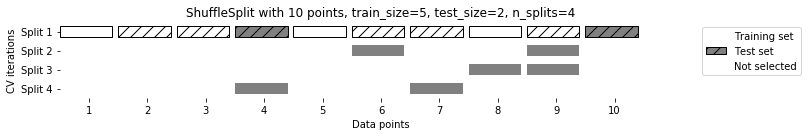

In [9]:
#перекрестная проверка со случайными перестановками при разбиении
mglearn.plots.plot_shuffle_split()

In [10]:
from sklearn.model_selection import ShuffleSplit

shuffle_split=ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=5)
scores=cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(scores)
print(scores.mean())

[ 0.89333333  0.94666667  0.90666667  0.97333333  0.97333333]
0.938666666667


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_shuffle_split=ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=5)
scores=cross_val_score(logreg, iris.data, iris.target, cv=stratified_shuffle_split)
print(scores)
print(scores.mean())

[ 0.98666667  0.93333333  0.85333333  0.94666667  0.93333333]
0.930666666667


In [12]:
#перекрестная проверка с использованием групп
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=12, random_state=0)

groups=[0,0,0,1,1,1,1,2,2,3,3,3]

scores=cross_val_score(logreg, X,y, groups, cv=GroupKFold(n_splits=3))
print(scores)

[ 0.75        0.8         0.66666667]


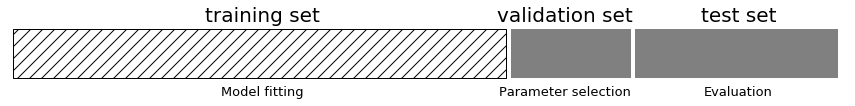

In [13]:
#тройное разбиение данных
mglearn.plots.plot_threefold_split()

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test=train_test_split(iris.data, iris.target, random_state=0)

X_train, X_valid, y_train, y_valid=train_test_split(X_trainval, y_trainval, random_state=1)

print(X_train.shape[0], X_valid.shape[0], X_test.shape[0])

84 28 38


In [15]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc=SVC(C=C, gamma=gamma)
        svc.fit(X_train, y_train)
        score=svc.score(X_valid, y_valid)
        if score>best_score:
            best_score=score
            best_parameters={'C':C, 'gamma':gamma}
            
svc=SVC(**best_parameters)
svc.fit(X_trainval, y_trainval)
test_score=svc.score(X_test, y_test)

print(best_score)
print(best_parameters)
print(test_score)

0.964285714286
{'C': 10, 'gamma': 0.001}
0.921052631579


In [16]:
#решетчатый поиск с перекрестной проверкой
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc=SVC(C=C, gamma=gamma)
        scores=cross_val_score(svc, X_trainval, y_trainval, cv=5)
        score=np.mean(scores)
        if score>best_score:
            best_score=score
            best_parameters={'C':C, 'gamma':gamma}
svc=SVC(**best_parameters)
svc.fit(X_trainval, y_trainval)
score_trainval=svc.score(X_trainval, y_trainval)
score_test=svc.score(X_test, y_test)
print(score_trainval)
print(score_test)

0.982142857143
0.973684210526


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing

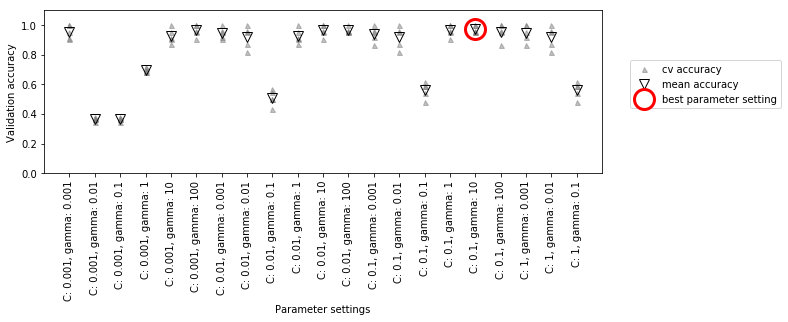

In [17]:
mglearn.plots.plot_cross_val_selection()

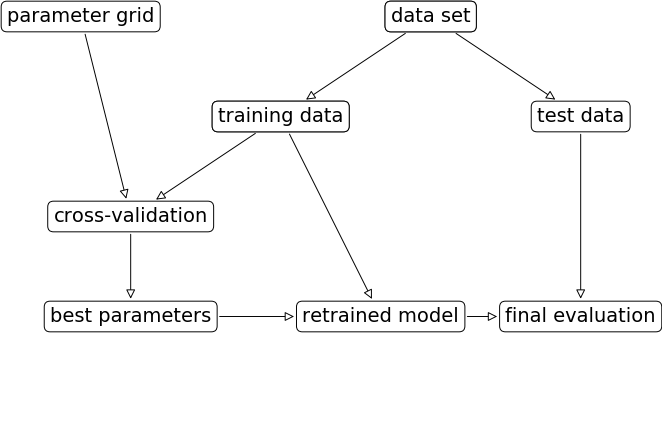

In [18]:
mglearn.plots.plot_grid_search_overview()

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
grid_search=GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print(grid_search.score(X_test, y_test))
print(grid_search.best_params_) #найденная наилучшая комбинация параметров
print(grid_search.best_score_) #средняя правильность перекрестной проверки

0.973684210526
{'C': 100, 'gamma': 0.01}
0.973214285714


In [20]:
grid_search.best_estimator_ #просмотр наилучшей модели

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_) #просмотр результатов решетчатого поиска
display(results.head())

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.00312,0.0,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.006240,0.0,0.011371,0.002852
1,0.00000,0.0,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000000,0.0,0.011371,0.002852
2,0.00000,0.0,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000000,0.0,0.011371,0.002852
3,0.00624,0.0,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.007642,0.0,0.011371,0.002852
4,0.00000,0.0,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000000,0.0,0.011371,0.002852


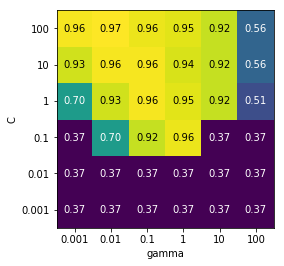

In [22]:
scores=np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')

In [23]:
#экономичный решетчатый поиск
param_grid= [{'kernel':['rbf'], 'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]},{'kernel':['linear'], 'C':[0.001,0.01,0.1,1,10,100]}]
grid_search=GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
display(results.T)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.973214285714


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00312004,0,0,0,0,0.00312004,0,0,0,0,...,0,0,0.00311999,0,0.00311999,0,0,0,0,0.00311999
mean_score_time,0,0,0,0,0,0,0.00312004,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.955357,0.946429,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.988788,1,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
rank_test_score,27,27,27,27,27,27,27,27,27,27,...,9,11,17,24,27,21,11,1,3,3
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333


In [25]:
#вложенная перекрестная проверка (используется внешний цикл по разбиениям данных на обучающий и тестовый наборы)
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print(scores)
print(scores.mean())

[ 0.96666667  1.          0.9         0.96666667  1.        ]
0.966666666667
